# Regression with all variables (SEER)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

In [ ]:
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('SEER_expanded_v1210.csv')

data_M0 = df[(df['Metastasis']=='M0') & (df['Stage']!='0')]
data_M0 = data_M0.drop(columns=['Metastasis', 'Death_All_Cause_ext']).reset_index()

In [3]:
X_M0 = pd.get_dummies(data_M0[['DURATION', 'Sex', 'Yr_dx', 'Laterality', 'reg_nod_pos', 'reg_nod_ex',
       'Ulceration', 'Mitotic rate', 'Site_rec_WHO08',
       'Origin', 'AYA_site_rec20', 'Tot_num_in_situ', 'Tot_num_benin',
       'Mar_stat', 'Age_dx', 'Extent', 'Surg_LN', 'Surg_primsite',
       'Surg_oth', 'Tumor', 'Positive_Node', 'Stage', 'YEAR', 'AGE']], drop_first=False)
w_M0 = data_M0['EXPO']
Y_M0 = data_M0['Death_skin']

In [4]:
x_M0_train, x_M0_test, y_M0_train, y_M0_test, w_M0_train, w_M0_test = train_test_split(X_M0, Y_M0, w_M0, test_size=0.2, stratify=Y_M0)

In [5]:
x_M0_train = sm.add_constant(x_M0_train)
x_M0_test = sm.add_constant(x_M0_test)

### First model: use all variables so that we can select the statistically significant ones

In [19]:
# All variables, dropped dummies with most individuals
col_all = ['const', 'DURATION', 'Yr_dx', 'Age_dx', 'YEAR',
           'AGE', 'Sex_Female', 'reg_nod_pos', 'reg_nod_ex',
           'Mitotic rate', 'Tot_num_in_situ', 'Tot_num_benin', 'Laterality_Bilateral',
           'Laterality_Not a paired site',
           'Laterality_One side', 'Laterality_Paired site',
           'Laterality_Paired site midline tumor', 'Laterality_Right origin',
           'Ulceration_Missing',
           'Ulceration_Ulceration', 'Site_rec_WHO08_Male Genital Organs',
           'Site_rec_WHO08_Vulva',
           'Origin_American Indian/AK Native', 'Origin_Asian or Pacific Islander',
           'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
           'AYA_site_rec20_Nodular melanoma',
           'AYA_site_rec20_Superficial spreading/low cumulative sun damage melanoma',
           'Mar_stat_Divorced', 'Mar_stat_Missing',
           'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
           'Mar_stat_Widowed', 'Extent_Distant',
           'Extent_Missing', 'Extent_Regional', 'Surg_LN_Missing',
           'Surg_LN_Surgery', 'Surg_primsite_Missing',
           'Surg_primsite_No surgery', 'Surg_oth_Missing',
           'Surg_oth_Surgery', 'Tumor_Missing', 'Tumor_T0',
           'Tumor_T2', 'Tumor_T3', 'Tumor_T4', 'Positive_Node_Missing',
           'Positive_Node_N1', 'Positive_Node_N2',
           'Positive_Node_N3', 'Stage_II', 'Stage_III',
           'Stage_Missing']

In [23]:
mod_all_M0 = sm.GLM(y_M0_train, x_M0_train[col_all], family=sm.genmod.families.family.Binomial(), freq_weights=w_M0_train)

In [24]:
res_all_M0 = mod_all_M0.fit()

print(res_all_M0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Death_skin   No. Observations:               430764
Model:                            GLM   Df Residuals:                404668.42
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14148.
Date:                Fri, 04 Nov 2022   Deviance:                       28297.
Time:                        14:01:41   Pearson chi2:                 3.30e+05
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01695
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


### Second model: use only selected variables

In [22]:
# Selected variables 
col_sel = ['const', 'DURATION', 'AGE', 'Sex_Female', 'reg_nod_pos',
           'Mitotic rate', 'Tot_num_in_situ', 'Laterality_Bilateral',
           'Laterality_Not a paired site',
           'Laterality_One side', 'Laterality_Paired site',
           'Laterality_Paired site midline tumor', 'Laterality_Right origin',
           'Ulceration_Missing', 'Ulceration_Ulceration',
           'Site_rec_WHO08_Male Genital Organs', 'Site_rec_WHO08_Vulva',
           'Origin_American Indian/AK Native', 'Origin_Asian or Pacific Islander',
           'Origin_Black', 'Origin_Hispanic', 'Origin_Missing',
           'Mar_stat_Divorced', 'Mar_stat_Missing',
           'Mar_stat_Separated', 'Mar_stat_Single', 'Mar_stat_Unmarried',
           'Mar_stat_Widowed', 'Extent_Distant',
           'Extent_Missing', 'Extent_Regional', 'Surg_primsite_Missing',
           'Surg_primsite_No surgery', 'Tumor_Missing', 'Tumor_T0',
           'Tumor_T2', 'Tumor_T3', 'Tumor_T4', 'Positive_Node_Missing',
           'Positive_Node_N1', 'Positive_Node_N2', 'Positive_Node_N3']

In [23]:
mod_all_M0 = sm.GLM(y_M0_train, x_M0_train[col_sel], family=sm.genmod.families.family.Binomial(), freq_weights=w_M0_train)

In [24]:
res_all_M0 = mod_all_M0.fit()

print(res_all_M0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Death_skin   No. Observations:               430764
Model:                            GLM   Df Residuals:                404668.42
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14148.
Date:                Fri, 04 Nov 2022   Deviance:                       28297.
Time:                        14:01:41   Pearson chi2:                 3.30e+05
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01695
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [25]:
data_pred = data_M0.loc[x_M0_test.index, :]

In [26]:
data_pred['Y_pred proba'] = res_all_M0.predict(x_M0_test[col_sel])

### Coefficients of the model

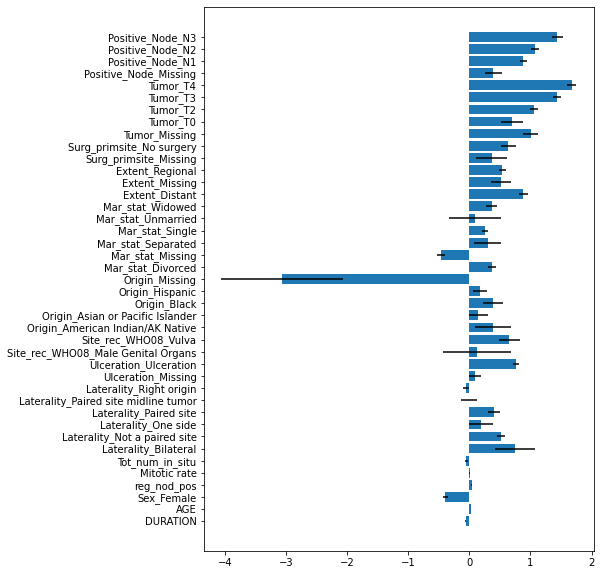

In [31]:
plt.figure(figsize=(7,10))
plt.barh(np.array(res_all_M0.params.index)[1:], res_all_M0.params[1:], xerr=res_all_M0.bse[1:])
# plt.savefig('seer_coeff_sel_v411.png')

### Performance metrics

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(data_pred['Death_skin'], data_pred['Y_pred proba'], sample_weight=w_M0_test)

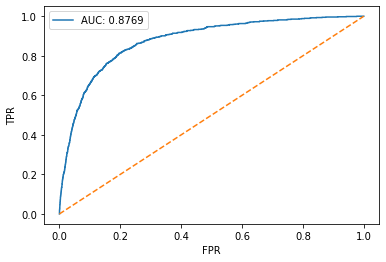

In [33]:
plt.plot(fpr, tpr, label='AUC: ' + str(np.round(metrics.roc_auc_score(data_pred['Death_skin'], data_pred['Y_pred proba'], sample_weight=w_M0_test), 4)))
plt.plot([0, 1], [0, 1], linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
# plt.savefig('ROC_selvar_v411.png')

### Threshold for classification

In [34]:
# Proportion of deaths in the dataset
data_M0['Death_skin'].value_counts()[1]/data_M0.shape[0]

0.007025643692335121

In [240]:
for i in np.linspace(0.1075, 0.11, 5):
    data_pred['Y_pred' + str(i)] = data_pred['Y_pred proba'] > i
    print(i, data_pred['Y_pred' + str(i)].value_counts()[1]/data_pred.shape[0])

0.1075 0.007595735987817108
0.108125 0.007456449875571073
0.10875 0.007372878208223452
0.109375 0.007289306540875831
0.11 0.00720573487352821


In [37]:
# Threshold of 0.10875 gives the same proportion for predicted deaths

0.007372878208223452

### Fairness metrics

In [218]:
Y = 'Death_skin'
Y_pred = 'Y_pred0.10875'
A = 'Mar_stat'
list_sens = data_pred[A].unique()

Global fairness metrics

In [95]:
FPs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[1, 0]
FNs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[0, 1]
TPs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[0, 0]
TNs=metrics.confusion_matrix(data_pred[Y], data_pred[Y_pred])[1, 1]

In [96]:
ARs = (TPs+FPs)/(TPs+FPs+FNs+TNs)
TPRs = TPs/(TPs+FNs)
FPRs = FPs/(FPs+TNs)
print(ARs, TPRs, FPRs)

Group-wise fairness metrics

In [225]:
FPs_A=[]
FNs_A=[]
TPs_A=[]
TNs_A=[]

for sens in list_sens:
    if metrics.confusion_matrix(data_pred[data_pred[A] == sens][Y], data_pred[data_pred[A] == sens][Y_pred]).shape == (2, 2):
        FPs_A.append(metrics.confusion_matrix(data_pred[data_pred[A] == sens][Y], data_pred[data_pred[A] == sens][Y_pred])[1, 0])
        FNs_A.append(metrics.confusion_matrix(data_pred[data_pred[A] == sens][Y], data_pred[data_pred[A] == sens][Y_pred])[0, 1])
        TPs_A.append(metrics.confusion_matrix(data_pred[data_pred[A] == sens][Y], data_pred[data_pred[A] == sens][Y_pred])[0, 0])
        TNs_A.append(metrics.confusion_matrix(data_pred[data_pred[A] == sens][Y], data_pred[data_pred[A] == sens][Y_pred])[1, 1])
    else:
        print(sens)

In [241]:
# for Origin, there are only TP
data_pred[data_pred['Origin'] == 'Missing'][Y_pred].value_counts(), data_pred[data_pred['Origin'] == 'Missing'][Y].value_counts()

(False    2365
 Name: Y_pred0.10875, dtype: int64,
 0    2365
 Name: Death_skin, dtype: int64)

In [226]:
TPRs_A = np.array([TPs_A[i]/(TPs_A[i]+FNs_A[i]) for i in range(len(FPs_A))])
FPRs_A = np.array([FPs_A[i]/(FPs_A[i]+TNs_A[i]) for i in range(len(FPs_A))])
ARs_A = np.array([(TPs_A[i]+FPs_A[i])/(TPs_A[i]+FPs_A[i]+FNs_A[i]+TNs_A[i]) for i in range(len(FPs_A))])
print(ARs_A, TPRs_A, FPRs_A)
print(np.var(ARs_A), np.var(TPRs_A), np.var(FPRs_A))

In [227]:
# ARs_A*100, max(ARs_A)-min(ARs_A)

(array([99.23320216, 98.81913759, 99.98748201, 97.47416762, 97.29402262,
        95.75      , 98.4375    ]),
 0.04237482005382731)

In [86]:
# TPRs_A[[0,2,1,4,3,5,6]]*100, max(TPRs_A)-min(TPRs_A)

(array([99.32685532, 99.99372746, 98.95424837, 97.54400327, 97.69066563,
        95.70707071, 98.42519685]),
 0.042866567509816655)

In [87]:
# FPRs_A[[0,2,1,4,3,5,6]]*100, max(FPRs_A)-min(FPRs_A)

(array([ 88.15789474,  97.10144928,  84.29752066,  78.78787879,
         82.19178082, 100.        , 100.        ]),
 0.21212121212121215)

In [183]:
# # Origin
# list_sens, list_sens[[0,2,4,3,5,1]]

(array(['White', 'Missing', 'Hispanic', 'Asian or Pacific Islander',
        'Black', 'American Indian/AK Native'], dtype=object),
 array(['White', 'Hispanic', 'Black', 'Asian or Pacific Islander',
        'American Indian/AK Native', 'Missing'], dtype=object))

In [221]:
# # Mar_stat
# list_sens, list_sens[[0,2,1,4,3,5,6]]

(array(['Married', 'Single', 'Missing', 'Divorced', 'Widowed', 'Separated',
        'Unmarried'], dtype=object),
 array(['Married', 'Missing', 'Single', 'Widowed', 'Divorced', 'Separated',
        'Unmarried'], dtype=object))

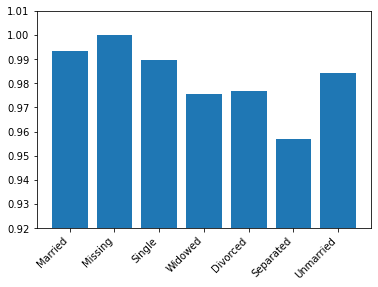

In [238]:
# plt.figure(figsize=(2,3))
plt.bar(list_sens, TPRs_A)
plt.ylim((0.92, 1.01))
plt.xticks(rotation=45, ha="right")
# plt.savefig('seer_TPR_marstat_allvar_v1011.png')

### Mortality rates

In [ ]:
# np.mean(data_pred['Y_pred proba'])

In [ ]:
# sum(data_pred['Y_pred proba'])/data_pred.shape[0]

In [ ]:
# sum(data_pred['Y_pred proba'])/sum(data_pred['EXPO'])

In [ ]:
# for A in ['Sex', 'Origin', 'Mar_stat']:
#     print('\n', A)
#     for a in data_pred[A].unique():
#         sel = data_pred[A] == a
#         print(a, sum(data_pred[sel]['Y_pred proba'])/data_pred[sel].shape[0])

In [ ]:
# morta = pd.DataFrame(index=data_pred['AGE'].unique()).sort_index()
# for age in morta.index:
#     morta.loc[age, 'General'] = np.mean(data_pred[data_pred['AGE'] == age]['Y_pred proba'])
# for A in ['Sex', 'Origin', 'Mar_stat']:
#     for a in data_pred[A].unique():
#         for age in morta.index:
#             if sum(data_pred[(data_pred['AGE'] == age) & (data_pred[A] == a)]['EXPO']) != 0:
#                 morta.loc[age, a] = np.mean(data_pred[(data_pred['AGE'] == age) & (data_pred[A] == a)]['Y_pred proba'])

In [ ]:
# # Moving Average smoothing
# morta['MA_General'] = morta['General'].rolling(3).mean()
# plt.plot(morta.index, morta['General'])
# plt.plot(morta.index, morta['MA_General'])

In [ ]:
# plt.plot(morta.index, morta['General'], label='General')
# for a in data_pred['Sex'].unique():
#     plt.plot(morta.index, morta[a], label=a)
# plt.legend()

In [ ]:
# plt.figure(figsize=(15,10))
# for a in data_pred['Origin'].unique():
#     plt.plot(morta.index, morta[a].rolling(5).mean(), label=a)
# plt.legend()
# plt.plot()

In [ ]:
# plt.figure(figsize=(15,10))
# for a in data_pred['Mar_stat'].unique():
#     plt.plot(morta.index, morta[a].rolling(5).mean(), label=a)
# plt.legend()
# plt.plot()